In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
%matplotlib inline
df = pd.read_csv('Energy_Dataset.csv')
df.Timestamp = pd.to_datetime(df.Timestamp)
rel_df = df.drop(labels=['Postcode','Customer', 'Price_AUD/MWh', 'Total_Demand_MWh', 'Latitude','Longitude' ], axis = 1)
total_df = rel_df.pivot_table(index='Timestamp',aggfunc='sum')
mean_df = rel_df.pivot_table(index='Timestamp',aggfunc='mean')

# Total_df 
Total energy production  accross all customers at 30 min intervals

### Monthly

In [2]:
def months(df):
    df = pd.DataFrame(df)
    df.reset_index(inplace = True)
    df.Timestamp = df.Timestamp.dt.strftime("%b")
    return df
rate ='M'
prod_t = months(total_df.Solar_Production_kWh.resample(rate).sum())
consum_t = months(total_df.Energy_Consumption_kWh.resample(rate).sum())
heating_t = months(total_df.Heating_Consumption_kWh.resample(rate).sum())

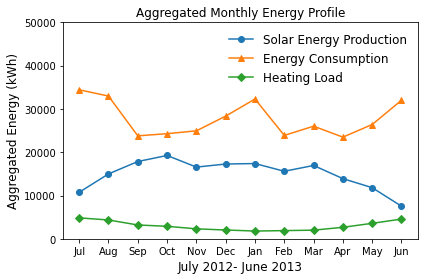

In [3]:
plt.figure()

plt.plot(prod_t.Timestamp, prod_t.Solar_Production_kWh, marker='o', label='Solar Energy Production')
plt.plot(consum_t.Timestamp, consum_t.Energy_Consumption_kWh, marker='^', label='Energy Consumption' )
plt.plot(heating_t.Timestamp,heating_t.Heating_Consumption_kWh,marker='D', label='Heating Load')

plt.ylabel('Aggregated Energy (kWh)', fontsize=12)
plt.xlabel('July 2012- June 2013', fontsize=12)

plt.gca().set_ylim([0,50000])

plt.legend(loc=1, fontsize =12, frameon=False)

plt.title('Aggregated Monthly Energy Profile')
plt.tight_layout()
plt.show()

### Daily

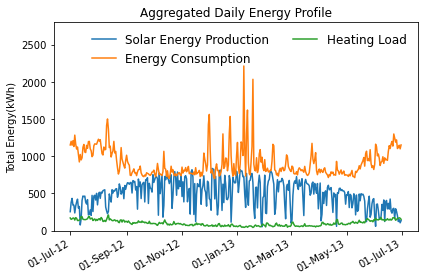

In [4]:
rate ='D'
sol= total_df.Solar_Production_kWh.resample(rate).sum()
cons = total_df.Energy_Consumption_kWh.resample(rate).sum()
heat = total_df.Heating_Consumption_kWh.resample(rate).sum()

plt.plot(sol, label='Solar Energy Production')
plt.plot(cons, label='Energy Consumption')
plt.plot(heat,label='Heating Load')

plt.ylabel('Total Energy(kWh)')
plt.gca().set_ylim([0,2800])

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%b-%y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.legend(loc=1, fontsize =12, frameon=False, ncol=2)

plt.title('Aggregated Daily Energy Profile')
plt.tight_layout()
plt.show()

# Mean_df 
Mean energy production  averaged accross all customers at 30 min intervals

### Monthly

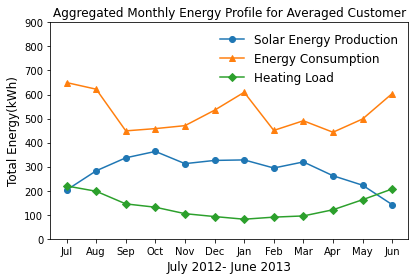

In [5]:
rate='M'
prod_m = months(mean_df.Solar_Production_kWh.resample(rate).sum())
consum_m = months(mean_df.Energy_Consumption_kWh.resample(rate).sum())
heating_m = months(mean_df.Heating_Consumption_kWh.resample(rate).sum())

plt.figure()
plt.plot(prod_m.Timestamp, prod_m.Solar_Production_kWh, marker='o', label='Solar Energy Production')
plt.plot(consum_m.Timestamp, consum_m.Energy_Consumption_kWh, marker='^', label='Energy Consumption' )
plt.plot(heating_m.Timestamp,heating_m.Heating_Consumption_kWh,marker='D', label='Heating Load')

plt.ylabel('Total Energy(kWh)',fontsize=12)
plt.xlabel('July 2012- June 2013', fontsize=12)
ax = plt.gca()
ax.set_ylim([0,900])

plt.legend(loc=1, fontsize =12, frameon=False)

plt.title('Aggregated Monthly Energy Profile for Averaged Customer')
plt.tight_layout()
plt.show()

### Daily

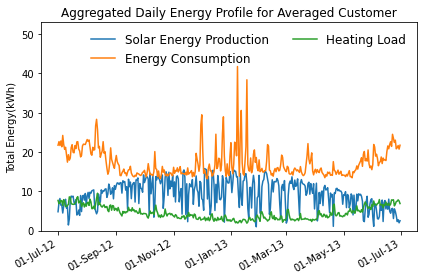

In [6]:
rate ='D'
sol= mean_df.Solar_Production_kWh.resample(rate).sum()
cons = mean_df.Energy_Consumption_kWh.resample(rate).sum()
heat = mean_df.Heating_Consumption_kWh.resample(rate).sum()

plt.plot(sol, label='Solar Energy Production')
plt.plot(cons, label='Energy Consumption')
plt.plot(heat,label='Heating Load')

plt.ylabel('Total Energy(kWh)')
plt.gca().set_ylim([0,53])

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%b-%y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.legend(loc=1, fontsize =12, frameon=False, ncol=2)

plt.title('Aggregated Daily Energy Profile for Averaged Customer')
plt.tight_layout()
plt.show()